In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

os.chdir('C:/Users/dalto/OneDrive/Pictures/Documents/Projects/MLB Season Model/') # wd

In [ ]:
df = pd.read_csv('./data/sample/full_data.csv')

#### exploring year to year % change in bat speed

In [28]:
age_swing_speed = df[['Age', 'avg_swing_speed', 'Name', 'PA']]
age_swing_speed = age_swing_speed.dropna(subset=['avg_swing_speed'])
age_swing_speed = age_swing_speed[age_swing_speed['PA'] > 200]
age_swing_speed['change'] = age_swing_speed.groupby('Name')['avg_swing_speed'].pct_change(1) * 100
age_swing_speed.sort_values(['Name', 'Age'])
print(f"Mean and Median % change yr/yr for player to player swing speed \n{age_swing_speed['change'].dropna().agg(['mean', 'median'])}")

Mean and Median % change yr/yr for player to player swing speed 
mean     -0.208459
median   -0.142045
Name: change, dtype: float64


In [29]:
print(f"Leauge AVG batspeed by Age \n {age_swing_speed.groupby('Age')['avg_swing_speed'].mean()}") # by age

Leauge AVG batspeed by Age 
 Age
20.0    72.200000
21.0    73.757143
22.0    72.585714
23.0    71.945714
24.0    71.371429
25.0    71.814085
26.0    71.374667
27.0    71.350769
28.0    71.023188
29.0    70.993846
30.0    71.824074
31.0    72.163265
32.0    71.395000
33.0    70.934286
34.0    70.150000
35.0    70.243750
36.0    71.270000
37.0    70.500000
38.0    69.100000
39.0    66.900000
40.0    68.200000
Name: avg_swing_speed, dtype: float64


#### Max EV Change

In [5]:
age_max_ev = df[['Age', 'Name', 'PA', 'maxEV']]
age_max_ev = age_max_ev.dropna(subset=['maxEV'])
age_max_ev = age_max_ev[age_max_ev['PA'] > 100]
age_max_ev['change'] = age_max_ev.groupby('Name')['maxEV'].pct_change(1) 
age_max_ev.sort_values(['Name', 'Age'])
print(f"Mean and Median % change yr/yr for player to player swing speed \n{age_max_ev['change'].dropna().agg(['mean', 'median'])}")

Mean and Median % change yr/yr for player to player swing speed 
mean     -0.000316
median   -0.000302
Name: change, dtype: float64


<p> logically I though this stats would be the most effected by aging as they are highly related to quick twitch muscle which declines with age. </n> These trends exist however sample bias is likley present as these metrics are highly realted with preformance so when people start to struggle with this they retire causing the average to not decrease as much <p>

#### Exploring this for all stats

In [6]:
def aging(df, col): # what is the precent change by year, not seperated by age
    curve = df[['Age', 'Name', 'PA', col]]
    curve = curve.dropna(subset=[col])
    curve = curve.dropna(subset=['Age'])
    curve = curve[curve['PA'] > 200]
    curve['change'] = curve.groupby('Name')[col].pct_change(1) * 100 
    return curve['change'].median()


In [20]:
def age_avg(cols): # average for each age for each stat
    age = df[df['PA'] > 200]  # filter rows where PA > 200
    age = age.groupby('Age').apply(lambda x: (x[cols] * x['PA']).sum() / x['PA'].sum()) # take the weighted avg
    return age

In [8]:
def age_avg_precent(cols): # what precent does something change by, in the previous year
    curve = df.groupby('Age').apply(lambda x: (x[cols] * x['PA']).sum() / x['PA'].sum())  # weighted average
    curve = curve.pct_change(1) * 100  # calculate percent change from previous row
    return curve


precent change in each stat

In [9]:
aging_curves = pd.DataFrame(columns=['Stat', 'Curve'])
for cols in df.columns:
    try:
        pd.to_numeric(df[cols])
        if cols not in ['Unnamed: 0', 'Season', 'MLBAMID', 'PA', 'Age']:  # exclude uneeded numeric
            new = {'Stat': cols, 'Curve': aging(df, cols)}
            aging_curves = pd.concat([aging_curves, pd.DataFrame([new])], ignore_index=True)
    except Exception:
        continue

print(f" \n precent decrease by year \n {aging_curves.head(30)}")

C:\Users\dalto\AppData\Local\Temp\ipykernel_32324\4164406583.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  aging_curves = pd.concat([aging_curves, pd.DataFrame([new])], ignore_index=True)


 
 precent decrease by year 
                     Stat      Curve
0                    BB%   0.054280
1                     K%   0.776656
2                  BABIP  -2.048780
3                   wRC+  -2.641628
4                    BsR -42.767638
5                    Def -26.531311
6                    WAR -27.449534
7                Barrel%   2.599132
8                  maxEV  -0.036737
9               HardHit%   0.450839
10              O-Swing%   0.783194
11              Z-Swing%   0.488162
12            O-Contact%  -0.347102
13            Z-Contact%  -0.096477
14              Contact%  -0.353941
15                SwStr%   1.170152
16                  CSW%   0.452171
17                  xslg  -2.127660
18                 xwoba  -1.277955
19       avg_swing_speed  -0.142045
20       fast_swing_rate  -0.858369
21    sweet_spot_percent  -0.937500
22    barrel_batted_rate  -1.064914
23  solidcontact_percent   0.000000
24      hard_hit_percent  -0.243309
25        avg_best_speed  -0.04714

In [10]:
age_precent_change = pd.DataFrame()
for cols in df.columns:
    try:
        pd.to_numeric(df[cols])
        if cols not in ['Unnamed: 0', 'Season', 'MLBAMID', 'PA', 'Age']:
            age_series = age_avg_precent(cols)
            age_precent_change[cols] = age_series
    except Exception as e:
        continue


C:\Users\dalto\AppData\Local\Temp\ipykernel_32324\2208657861.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  curve = df.groupby('Age').apply(lambda x: (x[cols] * x['PA']).sum() / x['PA'].sum())  # weighted average
C:\Users\dalto\AppData\Local\Temp\ipykernel_32324\2208657861.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  curve = df.groupby('Age').apply(lambda x: (x[cols] * x['PA']).sum() / x['PA'].s

In [11]:
age_precent_change.head(30)

,BB%,K%,BABIP,wRC+,BsR,Def,WAR,Barrel%,maxEV,HardHit%,...,fast_swing_rate,sweet_spot_percent,barrel_batted_rate,solidcontact_percent,hard_hit_percent,avg_best_speed,avg_hyper_speed,whiff_percent,n_outs_above_average,sprint_speed
Age,,,,,,,,,,,,,,,,,,,,,
19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20.0,-40.667504,8.195390,-4.074658,-15.145572,47.498088,-63.042783,-25.470317,-13.043867,-0.587608,-1.491462,...,56.466222,-15.902274,-23.972394,-24.188850,-23.470226,-26.038567,-25.988078,-12.760086,-132.220330,-23.237820
21.0,-13.558793,7.250967,-4.216995,-15.675091,-0.827604,-134.967213,-25.553946,-18.172396,-1.183487,-7.140963,...,4.255867,-7.545510,-23.569259,-17.602122,-14.641317,-9.691377,-9.384821,-10.456451,-92.454130,-9.289772
22.0,4.093853,-3.548733,0.250607,2.242748,34.470917,-17.360680,23.271028,1.383108,-0.540284,-3.708230,...,2.251141,-2.508512,-5.593515,-2.230452,-6.530605,-1.608391,-1.280012,-1.021351,461.025926,-1.363031
23.0,-1.280738,3.888035,-0.867588,-4.660895,-41.082932,-43.211041,-24.042579,-3.387297,-0.110819,1.822042,...,-26.178246,-6.671031,-9.346236,-8.209025,-5.171024,-6.307977,-6.294022,-5.586518,-74.817772,-7.009823
24.0,-0.492908,-0.767121,-0.232635,0.339474,-27.367498,-36.320621,-3.640055,0.302098,-0.187903,-2.562449,...,-23.585768,10.478333,7.512848,5.573712,4.279600,6.708809,6.847893,3.713560,-21.881908,6.456833
25.0,2.948592,-4.368341,-1.779692,0.115009,-19.275362,-120.566459,6.470467,-1.863485,-0.033710,-0.613507,...,10.245021,0.311733,2.103591,1.789712,2.320289,1.698346,1.661879,0.200416,-8.970044,0.933785
26.0,-0.706283,0.332957,0.688287,1.034838,-30.125844,-60.991285,1.852602,-0.100668,-0.027089,0.251676,...,-8.564967,4.362378,2.271867,6.865820,2.861837,3.037457,3.044519,3.350810,-12.645998,3.044842
27.0,0.586327,-1.908874,-1.151734,0.513223,-12.922826,-747.884497,1.940867,-0.425160,-0.048612,-0.840306,...,-16.692242,-0.623876,-2.352267,-3.908821,-1.792332,-0.207653,-0.158485,-2.102283,103.354094,-0.627751


different stats by age

In [21]:
stats_by_age = pd.DataFrame()
for cols in df.columns:
    try:
        pd.to_numeric(df[cols])
        if cols not in ['Unnamed: 0', 'Season', 'MLBAMID', 'PA', 'Age']:
            age_series = age_avg(cols)
            stats_by_age[cols] = age_series
    except Exception as e:
        continue


C:\Users\dalto\AppData\Local\Temp\ipykernel_32324\273679527.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  age = age.groupby('Age').apply(lambda x: (x[cols] * x['PA']).sum() / x['PA'].sum()) # take the weighted avg
C:\Users\dalto\AppData\Local\Temp\ipykernel_32324\273679527.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  age = age.groupby('Age').apply(lambda x: (x[cols] * x['PA']).sum() / x['PA'].s

In [22]:
# moved to its own cell bc of annoying lamaba warnings 
stats_by_age['Age'] = stats_by_age.index # move to its own col so corr can be done
stats_by_age = stats_by_age.reset_index(drop=True)
stats_by_age = stats_by_age[['Age'] + [col for col in stats_by_age.columns if col != 'Age']]
stats_by_age.head(26)

,Age,BB%,K%,BABIP,wRC+,BsR,Def,WAR,Barrel%,maxEV,...,fast_swing_rate,sweet_spot_percent,barrel_batted_rate,solidcontact_percent,hard_hit_percent,avg_best_speed,avg_hyper_speed,whiff_percent,n_outs_above_average,sprint_speed
0,19.0,0.159919,0.200405,0.337884,145.581137,0.892541,-7.827605,3.673353,0.101266,113.655000,...,0.000000,30.100000,9.800000,7.300000,42.200000,101.243944,94.872986,22.300000,-6.000000,27.200000
1,20.0,0.095616,0.211543,0.324131,125.041224,1.381548,-3.001937,2.971699,0.089064,113.272975,...,5.372009,25.762324,7.724523,5.668591,33.980852,78.502352,73.510349,20.380481,2.051028,21.980431
2,21.0,0.076195,0.226316,0.310688,107.800671,1.509185,1.602587,2.488543,0.079833,112.705815,...,9.330541,23.088680,6.395259,4.364156,28.595252,68.307373,64.080912,17.952210,0.241962,19.150481
3,22.0,0.084553,0.218350,0.315060,111.091415,1.997584,0.989040,2.946562,0.078722,111.640189,...,8.633196,22.276704,5.858246,4.318401,26.369547,65.882893,62.009949,17.352407,0.891583,18.536089
4,23.0,0.081912,0.228379,0.307237,103.147046,1.140463,0.704659,2.176978,0.074836,111.481478,...,6.802548,19.784703,4.950273,3.713908,24.045415,59.870293,56.391071,15.697337,0.246425,16.742629
5,24.0,0.081203,0.223932,0.306367,102.597046,0.823633,0.513701,2.056529,0.073330,111.116482,...,4.849138,22.567349,5.371098,4.016573,25.557886,65.902864,62.196578,16.487172,0.189883,18.364231
6,25.0,0.083240,0.214408,0.303120,103.970775,0.678873,0.008246,2.188306,0.072517,111.025540,...,5.755838,22.642284,5.545818,4.134154,26.217970,66.917231,63.114325,16.674888,0.159022,18.533395
7,26.0,0.083440,0.216369,0.304180,104.710819,0.468984,0.092769,2.207137,0.072492,111.013113,...,5.063382,23.787357,5.687426,4.398874,27.077478,69.289621,65.364757,17.330086,0.135275,19.169307
8,27.0,0.083328,0.211921,0.302385,105.397981,0.389893,0.263313,2.210487,0.071573,110.880841,...,4.196649,23.805103,5.551834,4.237127,26.633869,69.654356,65.762960,17.131656,0.305930,19.231270
9,28.0,0.086367,0.214498,0.297248,104.156274,0.186628,0.167199,2.148936,0.074075,110.789620,...,4.402959,23.675981,5.701483,4.331923,27.154376,69.904039,65.974591,17.430758,0.174032,19.184644


In [ ]:
# ioslate age to between 24 and 36, as younger and older you start dealing with outlier case
stats_by_age = stats_by_age[(stats_by_age['Age'] > 23) & (stats_by_age['Age'] < 37)] 
print(f"Age and Stats \n{stats_by_age.corr()['Age'].sort_values(ascending=False)}") 

age and stats 
Age                     1.000000
BB%                     0.910005
Contact%                0.791406
Z-Contact%              0.737515
O-Contact%              0.674911
HardHit%                0.281555
CSW%                   -0.424056
solidcontact_percent   -0.438649
Barrel%                -0.456317
fast_swing_rate        -0.473127
wRC+                   -0.477373
avg_swing_speed        -0.526386
hard_hit_percent       -0.547108
xwoba                  -0.636608
sweet_spot_percent     -0.650408
xslg                   -0.664601
barrel_batted_rate     -0.678974
avg_hyper_speed        -0.681554
avg_best_speed         -0.682240
whiff_percent          -0.717378
sprint_speed           -0.799339
maxEV                  -0.801332
Z-Swing%               -0.822530
WAR                    -0.834627
BABIP                  -0.851720
SwStr%                 -0.861817
n_outs_above_average   -0.870570
O-Swing%               -0.901061
K%                     -0.916089
Def                    -0.92

A lot of these correlations are not directly because of age and have a lot of confounding. I would argue that while walk rate is likely correlated with experince, those with hyper low walk rates are not going to have sucess long term and will not be in the MLB anymore. This is not a function of age but a function of the quality of player . Most intresting to me are the BABIP, BSR, DEF, and swing speed stats. Those will be important to account for when building the model realationships with age.

#### Highlighting Key Age Decreases 

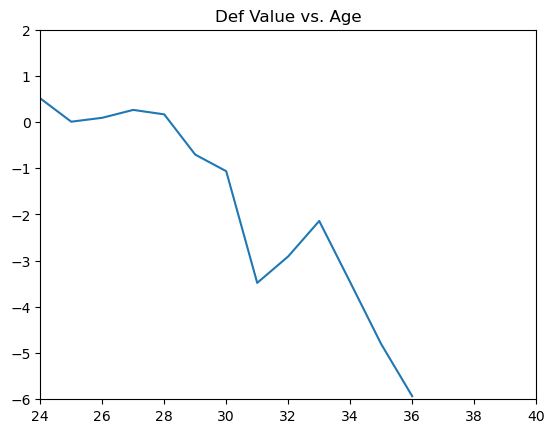

In [24]:
# calcuating defense is a very hard problem (kinda) and I do not wanna tackle it in this project. I am more intrested in building out a monte carlo simulation and a future year model. I will use OAA and Def as my def stats for value even though they have issues.
plt.plot(stats_by_age['Age'], stats_by_age['Def'])
plt.ylim(-6, 2)
plt.xlim(24, 40)
plt.title('Def Value vs. Age')
plt.show()
# age is a very important metric in predecting future age value

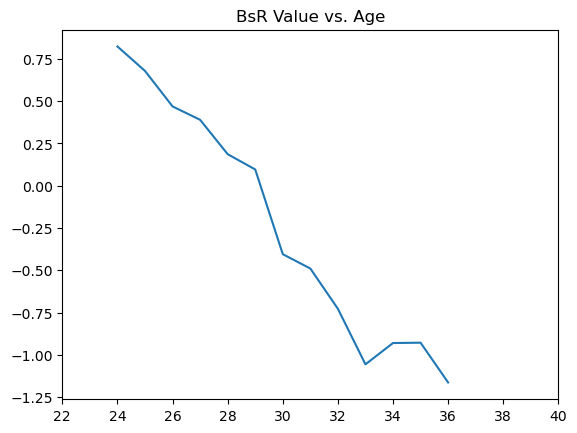

In [25]:
plt.plot(stats_by_age['Age'], stats_by_age['BsR'])
plt.xlim(22, 40)
plt.title('BsR Value vs. Age')
plt.show()

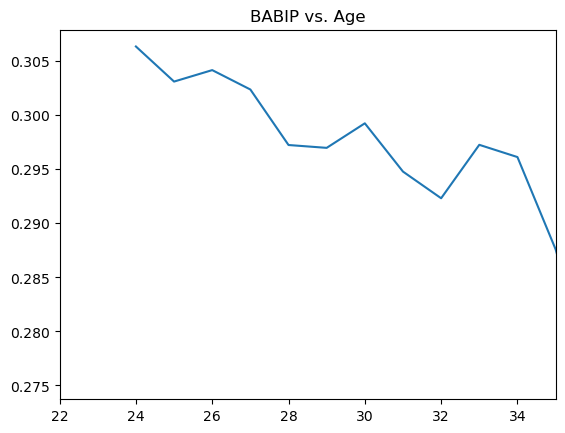

In [26]:
plt.plot(stats_by_age['Age'], stats_by_age['BABIP'])
plt.xlim(22, 35)
plt.title('BABIP vs. Age')
plt.show()